In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
cancer = pd.read_csv('data/cancer.csv')

In [14]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
gbrt_clf = GradientBoostingClassifier().fit(X_train, y_train)
gbrt_clf.score(X_train, y_train), gbrt_clf.score(X_test, y_test)

(1.0, 0.95804195804195802)

In [74]:
def 모델평가(모델, X_train, X_test, y_train, y_test):
    모델.fit(X_train, y_train)
    훈련점수 = 모델.score(X_train, y_train)
    시험점수 = 모델.score(X_test, y_test)
    return 훈련점수, 시험점수

eval_model = 모델평가

In [105]:
gbrt_clf = GradientBoostingClassifier()
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(1.0, 0.95104895104895104)

In [76]:
gbrt_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [135]:
gbrt_clf = GradientBoostingClassifier(max_depth=2)
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(1.0, 0.95104895104895104)

In [199]:
gbrt_clf = GradientBoostingClassifier(learning_rate=1000, max_depth=5)
eval_model(gbrt_clf, X_train, X_test, y_train, y_test)

(0.99765258215962438, 0.92307692307692313)

그리드 탐색을 활용한 모델 튜닝

In [204]:
param_grid = 변수조합 = {'max_depth' : [1, 2, 3, 4, 5], 'learning_rate': [ 0.01, 0.1, 1, 10, 100]}

In [202]:
from sklearn.model_selection import GridSearchCV

모델을 제공할 때, 옵션은 param_grid에서 제공하지 않는 변수들만 설정

In [254]:
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, return_train_score=True)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [227]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [228]:
grid_search.score(X_test, y_test)

0.97202797202797198

In [229]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3}

In [230]:
grid_search.best_score_

0.95774647887323938

In [232]:
best_model = grid_search.best_estimator_

In [241]:
eval_model(best_model, X_train, X_test, y_train, y_test)

(1.0, 0.97202797202797198)

데이터가 작을수록 교차검증의 필요성이 높다.

In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

gbrt_clf = GradientBoostingClassifier()
iris = load_iris()

scores = cross_val_score(gbrt_clf, iris.data, iris.target)
print("교차 검증 점수 : {}".format(scores))

교차 검증 점수 : [ 0.98039216  0.92156863  1.        ]


In [251]:
from sklearn.model_selection import cross_val_score

iris = pd.read_csv('data/iris.data', header=None)

y = iris[4]
X = iris.values[:, :4].astype('float32')

gbrt_clf = GradientBoostingClassifier()

scores = cross_val_score(estimator=gbrt_clf, X=X, y=y, cv=5)
scores

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [253]:
np.mean(scores)

0.95999999999999996

In [250]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score>

# SVM

In [263]:
from sklearn.svm import SVC, SVR
# SVC -> Classifier
# SVR -> Regressor

In [264]:
y = cancer['type']
X = cancer.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [269]:
eval_model(SVC(), X_train, X_test, y_train, y_test)

(1.0, 0.67832167832167833)

```
수치가 낮게 나오는 이유
 -> SVM은 거리를 구하는 것이 중요한데, 단위가 다르다면 매우 이상하게 계산될 수 있다.
 -> 단위에 민감한 특성 때문에 Scaling이 필요.
```

In [270]:
from sklearn.preprocessing import MinMaxScaler

In [271]:
scaler = MinMaxScaler().fit(X_train)

In [272]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [273]:
X_train_scaled

array([[ 0.26499119,  0.29387894,  0.24904987, ...,  0.03014433,
         0.18513408,  0.05975443],
       [ 0.32651803,  0.21812651,  0.30806443, ...,  0.15591066,
         0.19242904,  0.07236195],
       [ 0.1783804 ,  0.177883  ,  0.16909683, ...,  0.11728521,
         0.14471611,  0.08194894],
       ..., 
       [ 0.15471625,  0.21880284,  0.15707275, ...,  0.33484533,
         0.20544168,  0.274542  ],
       [ 0.5735718 ,  0.5607034 ,  0.58952391, ...,  0.63264602,
         0.14688486,  0.2417756 ],
       [ 0.29007521,  0.43388572,  0.29873541, ...,  0.38694155,
         0.50512624,  0.34401479]], dtype=float32)

In [274]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0000001)

In [276]:
X_test_scaled.min(), X_test_scaled.max()

(-0.099230528, 1.2797104)

In [279]:
eval_model(SVC(kernel='linear'), X_train_scaled, X_test_scaled, y_train, y_test)

(0.98356807511737088, 0.97902097902097907)

In [290]:
eval_model(SVC(kernel='rbf'), X_train_scaled, X_test_scaled, y_train, y_test)

(0.94835680751173712, 0.95804195804195802)

```
 -> 결과로 인해 알 수 있는 것
   -> 데이터가 매우 선형적이다, linear에서 오히려 결과가 잘나옴
   -> 선형적인 데이터에 비선형적 모델을 적용시키면 오히려 과적합 문제가 발생할 수 있다.
```

In [292]:
boston = pd.read_csv('data/boston.csv')

In [298]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [299]:
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [303]:
eval_model(SVR(kernel='linear'), X_train_scaled, X_test_scaled, y_train, y_test)

(0.62316561205597154, 0.67699212900593242)

In [306]:
eval_model(SVR(kernel='rbf'), X_train_scaled, X_test_scaled, y_train, y_test)

(0.35031542791239179, 0.43363299109057174)

```
결과가 오히려 안 좋아진 이유
 -> 매개변수에 매우 민감하기 때문
 -> C(가중치의 정도 설정)와 gamma 매개변수 튜닝이 매우 중요
```

In [307]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
#범위는 같지만 의미는 다르다

In [309]:
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)

In [311]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [312]:
grid_search.best_score_

0.84043421900127668

In [313]:
best_model = grid_search.best_estimator_

In [314]:
best_model.score(X_test_scaled, y_test)

0.89354095015069634

In [315]:
grid_search.best_params_

{'C': 100, 'gamma': 1}

# 딥러닝

In [316]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [376]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[10])

In [318]:
y = cancer['type']
X = cancer.values[:, 1:]

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [327]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [366]:
eval_model(mlp_clf, X_train, X_test, y_train, y_test)

(0.8779342723004695, 0.93006993006993011)

In [360]:
X.shape

(569, 30)

In [371]:
y = boston['Price']
X = boston.values[:, 1:].astype('float32')

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [396]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[40, 20], max_iter=400)

In [401]:
eval_model(mlp_reg, X_train, X_test, y_train, y_test)

(0.60970623041448013, 0.58648448529171926)

In [402]:
from sklearn.datasets import make_blobs

In [423]:
X, y = make_blobs(random_state=1)

In [424]:
X.shape

(100, 2)

2차원 평면에 그리기 쉽기 위해 2개의 특성

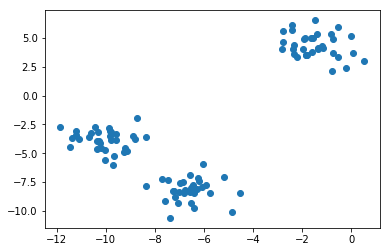

In [406]:
plt.scatter(X[:, 0], X[:, 1])

In [407]:
from sklearn.cluster import KMeans

In [408]:
kmeans = KMeans(n_clusters=3).fit(X)

In [411]:
y_pred = kmeans.predict(X)

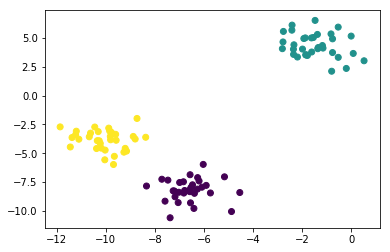

In [413]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

여기서 추출한 y를 정답으로 받아들이고 지도학습의 대상으로 삼을 수 있음

In [416]:
X2, y2 = make_blobs(n_samples=200, cluster_std=[1., 2.5, 0.5], random_state=170)

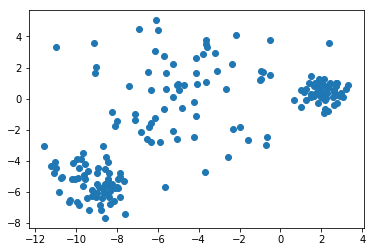

In [417]:
plt.scatter(X2[:, 0], X2[:, 1])

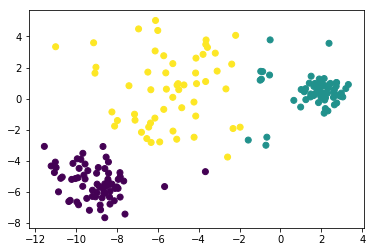

In [418]:
kmeans = KMeans(n_clusters=3).fit(X2)
y_pred = kmeans.predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred)

# DBSCAN
군집개수를 지정할 필요가 없음

In [419]:
from sklearn.datasets import make_moons

In [429]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

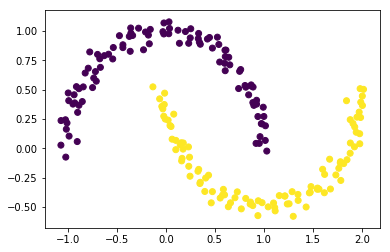

In [430]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [431]:
kmeans = KMeans(n_clusters=2).fit(X)
y_pred_km = kmeans.predict(X)

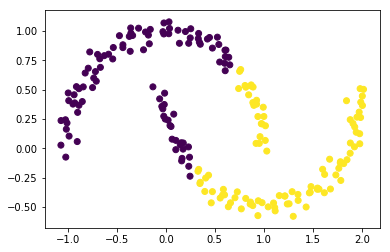

In [432]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_km)

In [436]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [434]:
scaler = StandardScaler().fit(X)
Xs = scaler.transform(X)

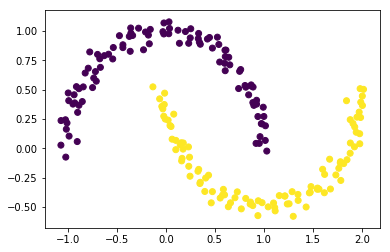

In [435]:
y_pred = DBSCAN().fit_predict(Xs)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

EPS(점 간의 거리)를 바꾸며 내가 원하는 클러스터로 나뉘도록 유도해야 함

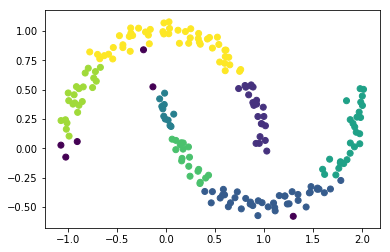

In [442]:
y_pred2 = DBSCAN(eps=0.2).fit_predict(Xs)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2)

In [449]:
len(np.unique(y_pred2))

8